In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor


# Loading Dataset & EDA

In [77]:

df = pd.read_csv("/Users/saureeshpamidipati/Documents/Acads/SEM - 3/STA - 5703/Project 1/train.csv")
print("Shape of dataset:", df.shape)

df.head()


Shape of dataset: (21263, 82)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [78]:

# missing values
missing_values = df.isnull().sum().sum()
print("Total missing values:", missing_values)

features = df.drop(columns=["critical_temp"])
target = df["critical_temp"]

print("Number of features:", features.shape[1])
print("Target variable: critical_temp")

# Summary statistics of target variable
df['critical_temp'].describe()


Total missing values: 0
Number of features: 81
Target variable: critical_temp


count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

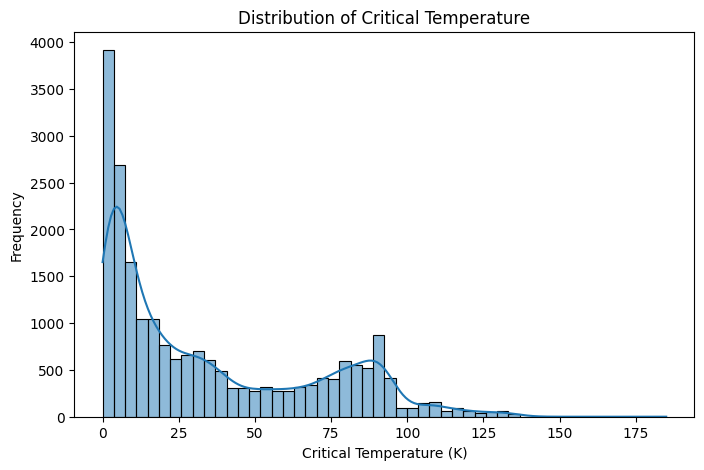

In [79]:
# Visualize distribution of critical_temp

plt.figure(figsize=(8,5))
sns.histplot(df['critical_temp'], bins=50, kde=True)
plt.title("Distribution of Critical Temperature")
plt.xlabel("Critical Temperature (K)")
plt.ylabel("Frequency")
plt.show()


# Test-Train Splitting

In [80]:
X = df.drop(columns=["critical_temp"])
y = df["critical_temp"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (17010, 81) Test size: (4253, 81)


# Linear Regression

In [81]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predictions
y_pred_lin = linreg.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lin)
rmse = mean_squared_error(y_test, y_pred_lin, squared=False)
r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Linear Regression Performance:
MAE: 13.21052205079507
RMSE: 17.37836334497896
R²: 0.7376312737139175


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [82]:
# Calculate AIC and BIC for Linear Regression

n = X_test.shape[0]
k = X_test.shape[1] + 1

rss = np.sum((y_test - y_pred_lin) ** 2)

aic = n * np.log(rss/n) + 2 * k
bic = n * np.log(rss/n) + k * np.log(n)

print("AIC:", aic)
print("BIC:", bic)


AIC: 24450.551901180792
BIC: 24971.69305259159


In [83]:
# Extract regression coefficients

intercept = linreg.intercept_
coefficients = pd.Series(linreg.coef_, index=X_train.columns)

print("Intercept:", intercept)
print("\nTop 10 coefficients:")
print(coefficients.sort_values(key=abs, ascending=False).head(50))


Intercept: -21.96812780524815

Top 10 coefficients:
entropy_fie                       -100.622940
entropy_Valence                     72.874329
wtd_entropy_Valence                -69.112974
entropy_atomic_radius               63.880281
wtd_entropy_fie                     43.935971
wtd_entropy_atomic_radius           42.796958
entropy_atomic_mass                -35.912909
wtd_entropy_FusionHeat              26.903078
wtd_gmean_Valence                  -26.782318
wtd_std_Valence                    -23.726968
wtd_mean_Valence                    22.900941
wtd_entropy_ElectronAffinity       -22.385723
gmean_Valence                       21.160389
entropy_FusionHeat                 -21.098291
wtd_entropy_Density                -20.616255
mean_Valence                       -17.318998
entropy_Density                     16.729314
entropy_ThermalConductivity         11.230031
std_Valence                          6.034987
entropy_ElectronAffinity             5.877642
range_Valence               

In [84]:
# Regression equation

equation = "critical_temp = {:.3f}".format(intercept)
for feat, coef in coefficients.head(5).items():
    equation += " + ({:.3f} * {})".format(coef, feat)

print("Regression Equation (first 5 terms):")
print(equation)


Regression Equation (first 5 terms):
critical_temp = -21.968 + (-3.435 * number_of_elements) + (0.877 * mean_atomic_mass) + (-0.963 * wtd_mean_atomic_mass) + (-0.526 * gmean_atomic_mass) + (0.694 * wtd_gmean_atomic_mass)


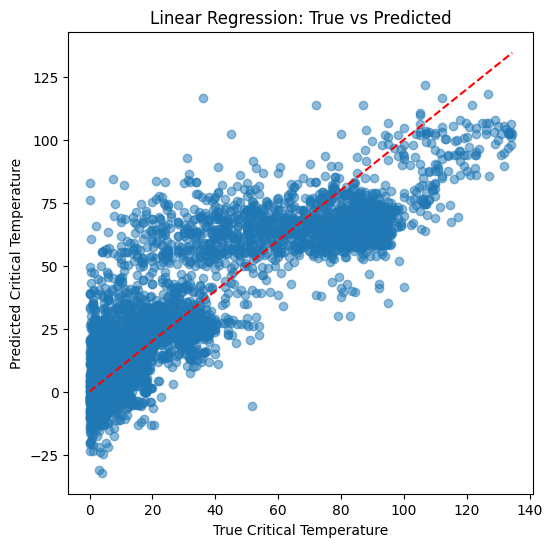

In [85]:
# True vs Predicted values scatter plot

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Critical Temperature")
plt.ylabel("Predicted Critical Temperature")
plt.title("Linear Regression: True vs Predicted")
plt.show()


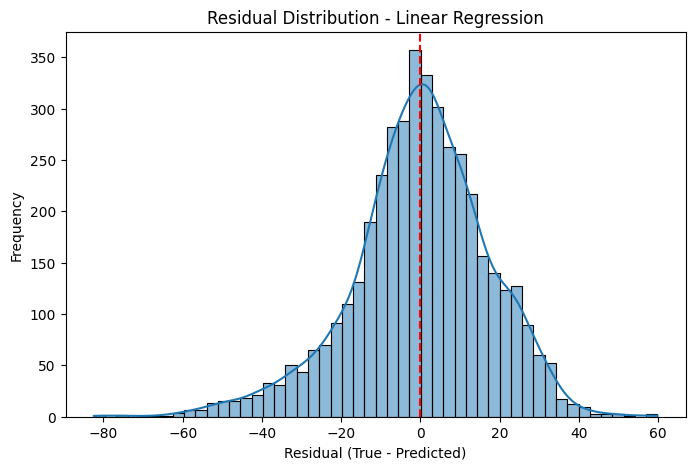

In [86]:
# Residual plot (errors)

residuals = y_test - y_pred_lin

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (True - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Linear Regression")
plt.show()


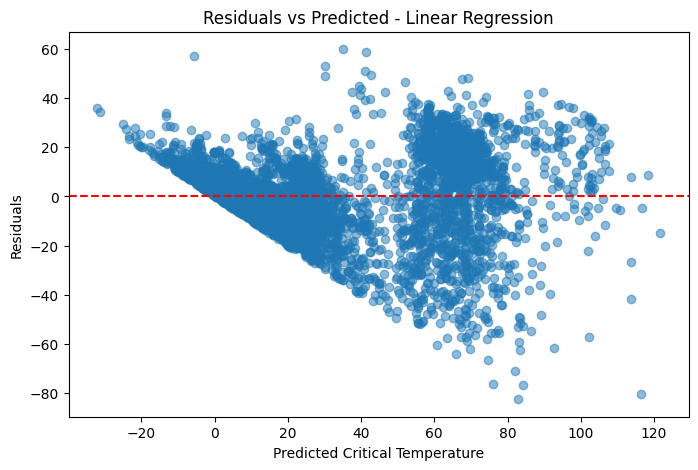

In [87]:
# Residuals vs Predicted values

plt.figure(figsize=(8,5))
plt.scatter(y_pred_lin, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Critical Temperature")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - Linear Regression")
plt.show()


# Oridnary Least Squares

In [88]:
ols_model = sm.OLS(y, X)
ols_result = ols_model.fit()
print(ols_result.summary())


                                 OLS Regression Results                                
Dep. Variable:          critical_temp   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1737.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):                        0.00
Time:                        18:57:02   Log-Likelihood:                         -91108.
No. Observations:               21263   AIC:                                  1.824e+05
Df Residuals:                   21182   BIC:                                  1.830e+05
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [89]:
y_pred_ols = ols_result.predict(X) 
mae_ols = mean_absolute_error(y, y_pred_ols)
rmse_ols = mean_squared_error(y, y_pred_ols, squared=False)
print(mae_ols, rmse_ols)

13.294930656438007 17.564706506240363


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Ridge Regression

In [90]:
# Ridge Regression

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Performance:")
print("MAE:", mae_ridge)
print("RMSE:", rmse_ridge)
print("R²:", r2_ridge)

# Coefficients
ridge_coef = pd.Series(ridge.coef_, index=X_train.columns)
print("\nTop 10 Ridge coefficients:")
print(ridge_coef.sort_values(key=abs, ascending=False).head(10))


Ridge Regression Performance:
MAE: 13.247376858958681
RMSE: 17.461978240074032
R²: 0.7351004588636023

Top 10 Ridge coefficients:
wtd_entropy_Valence            -28.070942
wtd_entropy_atomic_radius       20.707341
wtd_entropy_FusionHeat          19.342160
wtd_entropy_ElectronAffinity   -18.649631
entropy_atomic_mass            -17.433301
wtd_entropy_fie                 16.847317
wtd_std_Valence                -15.903585
entropy_Valence                 14.163039
wtd_entropy_Density            -13.520275
entropy_ThermalConductivity      9.859093
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


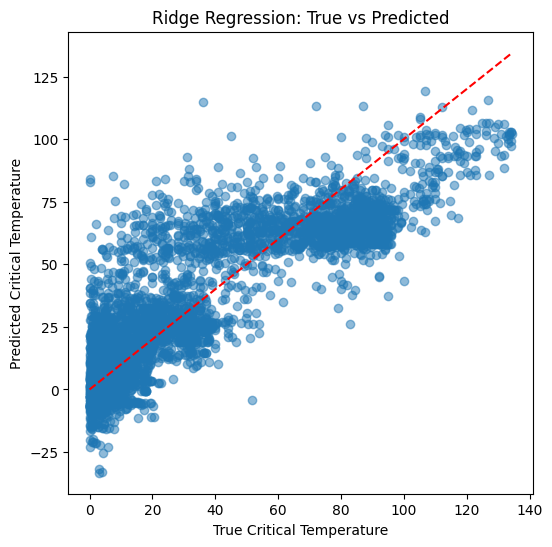

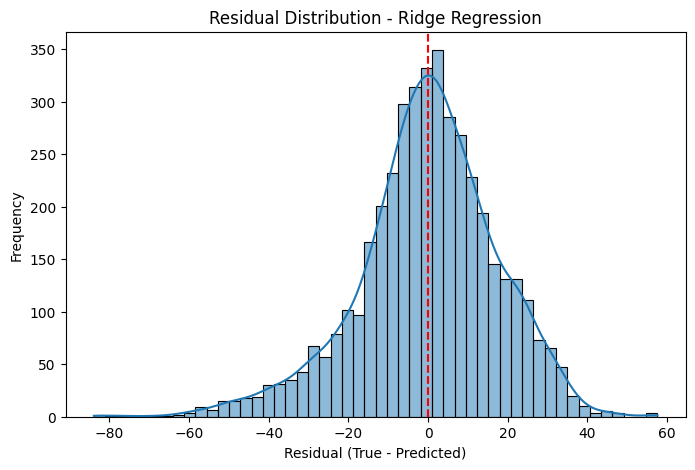

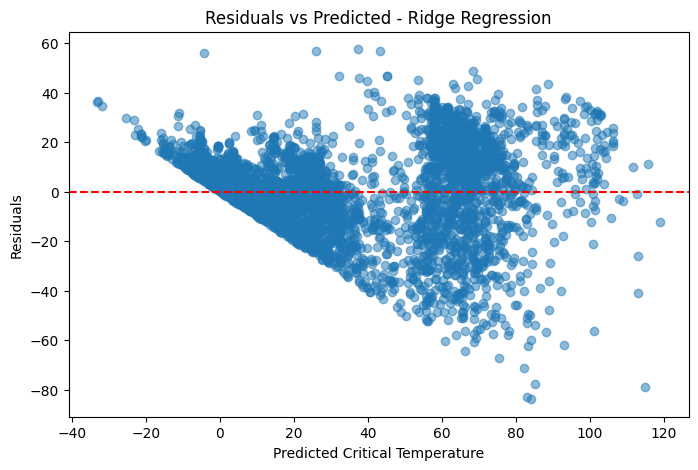

In [91]:
# Ridge Regression Visualizations

# Residuals
residuals_ridge = y_test - y_pred_ridge

# True vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Critical Temperature")
plt.ylabel("Predicted Critical Temperature")
plt.title("Ridge Regression: True vs Predicted")
plt.show()

# Residual histogram
plt.figure(figsize=(8,5))
sns.histplot(residuals_ridge, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (True - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Ridge Regression")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Critical Temperature")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - Ridge Regression")
plt.show()


# Lasso Regression

In [92]:
# Lasso Regression

lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Metrics
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Performance:")
print("MAE:", mae_lasso)
print("RMSE:", rmse_lasso)
print("R²:", r2_lasso)

# Non-zero coefficients
lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)
non_zero = lasso_coef[lasso_coef != 0]
print("\nNumber of selected features:", len(non_zero))
print("Top 10 Lasso coefficients:")
print(non_zero.sort_values(key=abs, ascending=False).head(10))


Lasso Regression Performance:
MAE: 13.241689252335656
RMSE: 17.450483877324938
R²: 0.7354490848025379

Number of selected features: 74
Top 10 Lasso coefficients:
wtd_entropy_Valence            -43.704583
wtd_entropy_atomic_radius       29.879430
wtd_entropy_fie                 24.526701
entropy_Valence                 22.443473
wtd_entropy_FusionHeat          18.755369
wtd_entropy_ElectronAffinity   -17.111389
wtd_std_Valence                -16.282069
entropy_atomic_mass            -12.567168
entropy_ThermalConductivity     10.501226
wtd_entropy_Density             -9.443516
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+06, tolerance: 2.005e+03
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


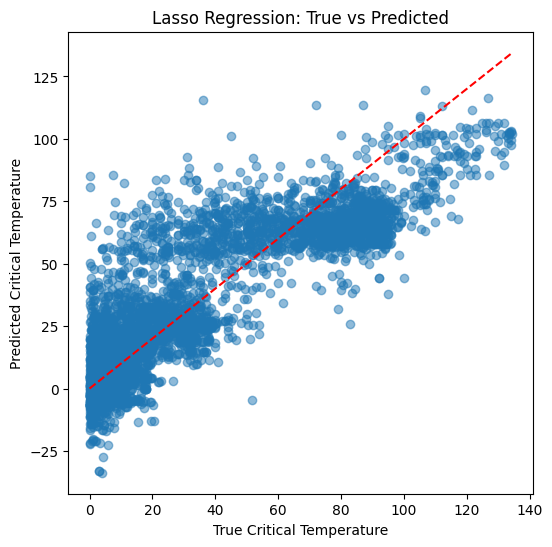

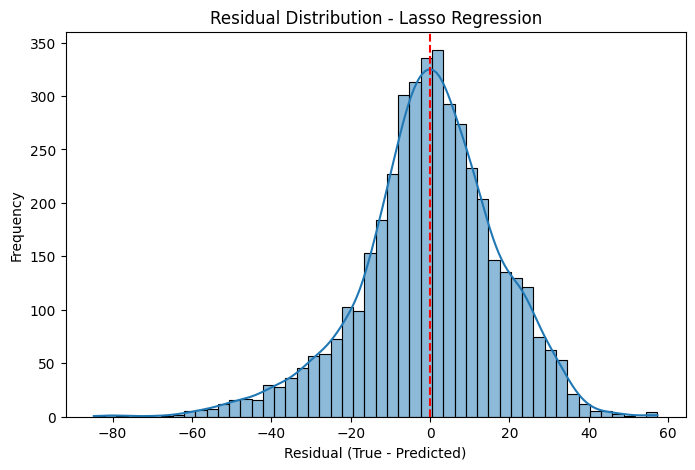

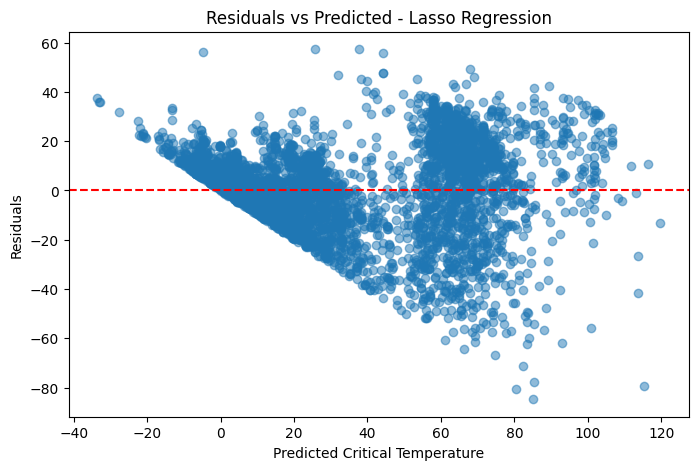

In [93]:
# Lasso Regression Visualizations

# Residuals
residuals_lasso = y_test - y_pred_lasso

# True vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Critical Temperature")
plt.ylabel("Predicted Critical Temperature")
plt.title("Lasso Regression: True vs Predicted")
plt.show()

# Residual histogram
plt.figure(figsize=(8,5))
sns.histplot(residuals_lasso, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (True - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Lasso Regression")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Critical Temperature")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - Lasso Regression")
plt.show()


# Ridge vs Lasso

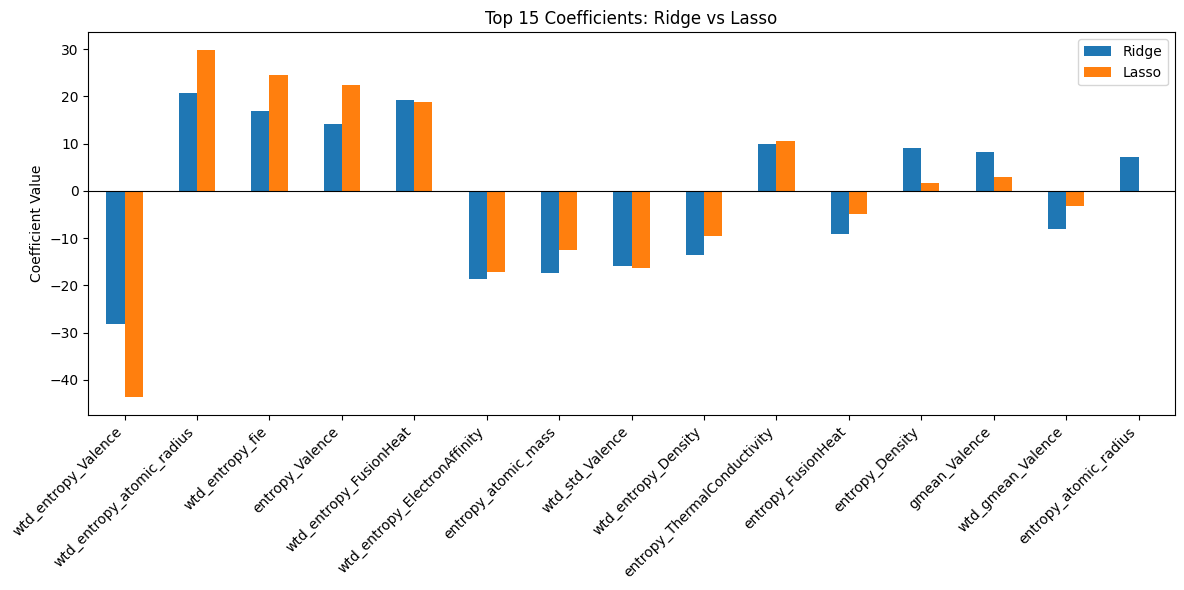

In [94]:
ridge_coefs = pd.Series(ridge.coef_, index=X_train.columns, name="Ridge")
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns, name="Lasso")

coef_df = pd.concat([ridge_coefs, lasso_coefs], axis=1)

top_k = 15
top_features = coef_df.abs().max(axis=1).sort_values(ascending=False).head(top_k).index
coef_top = coef_df.loc[top_features]

coef_top.plot(kind="bar", figsize=(12,6))
plt.axhline(0, color="black", linewidth=0.8)
plt.title(f"Top {top_k} Coefficients: Ridge vs Lasso")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# KNN Regression

In [95]:
# KNN Regression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regression Performance:")
print("MAE:", mae_knn)
print("RMSE:", rmse_knn)
print("R²:", r2_knn)


KNN Regression Performance:
MAE: 5.939907992711028
RMSE: 10.460596944753453
R²: 0.9049379319515816


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


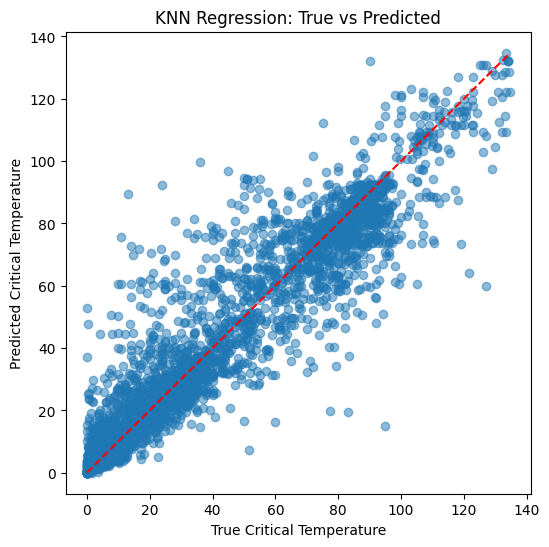

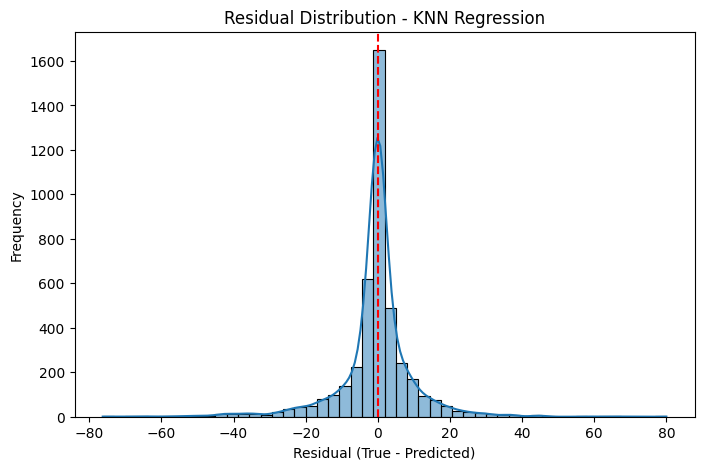

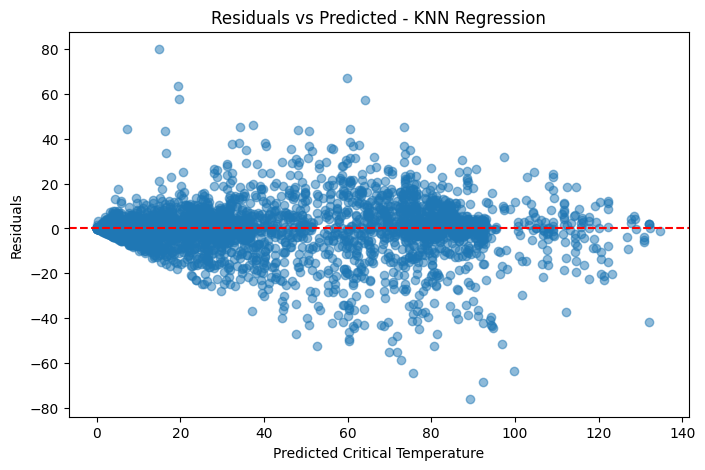

In [96]:
# KNN Regression Visualizations

# Residuals
residuals_knn = y_test - y_pred_knn

# True vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Critical Temperature")
plt.ylabel("Predicted Critical Temperature")
plt.title("KNN Regression: True vs Predicted")
plt.show()

# Residual histogram
plt.figure(figsize=(8,5))
sns.histplot(residuals_knn, bins=50, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (True - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution - KNN Regression")
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_pred_knn, residuals_knn, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Critical Temperature")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - KNN Regression")
plt.show()


# Model Comparison & Evaluation Metrics

In [97]:
# Function to compute Adjusted R-square
def adjusted_r2(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - n_features - 1)

adj_r2_lin = adjusted_r2(y_test, y_pred_lin, X_test.shape[1])
adj_r2_ridge = adjusted_r2(y_test, y_pred_ridge, X_test.shape[1])
adj_r2_lasso = adjusted_r2(y_test, y_pred_lasso, X_test.shape[1])
adj_r2_knn = adjusted_r2(y_test, y_pred_knn, X_test.shape[1])

In [98]:
# Collect results into a table
results = pd.DataFrame({
    "Model": ["Linear","OLS", "Ridge", "Lasso", "KNN"],
    "MAE": [mae, mae_ols,mae_ridge, mae_lasso, mae_knn],
    "RMSE": [rmse,mae_ols, rmse_ridge, rmse_lasso, rmse_knn],
    "R²": [r2,'0.869', r2_ridge, r2_lasso, r2_knn],
    "Adj R²": [adj_r2_lin,'0.869', adj_r2_ridge, adj_r2_lasso, adj_r2_knn]
})

print("\nModel Comparison:")
display(results)



Model Comparison:


,Model,MAE,RMSE,R²,Adj R²
0,Linear,13.210522,17.378363,0.737631,0.732536
1,OLS,13.294931,13.294931,0.869,0.869
2,Ridge,13.247377,17.461978,0.7351,0.729956
3,Lasso,13.241689,17.450484,0.735449,0.730312
4,KNN,5.939908,10.460597,0.904938,0.903092
